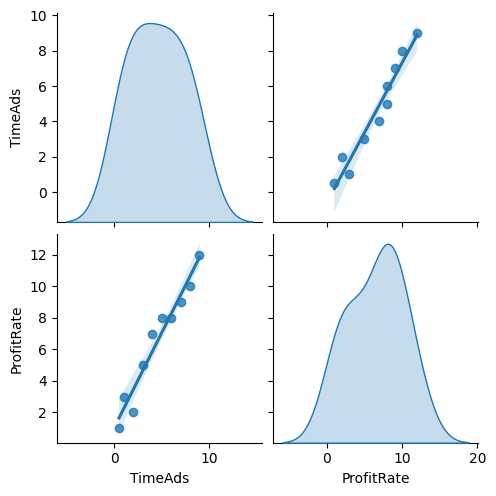

In [1]:
# Simple Linear Regression

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('data_slr.xlsx',sheet_name="data")

sns.pairplot(df[['TimeAds','ProfitRate']], 
             diag_kind='kde', kind='reg')
plt.show()

In [3]:
# Tập dữ liệu Input (đặc trưng) và Output (mục tiêu)
X = df[['TimeAds']].values # explanatory = feature
y = df[['ProfitRate']].values # reponse = target

# Đảm bảo dữ liệu là kiểu số thực
X = X.astype(float)
y = y.astype(float)

# Cross Validation
# Chia tách ra training (huấn luyện) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, 
                                                    random_state=16)

# Xây dựng mô hình hồi quy tuyến tính đơn biến: ProfitRate = f(TimeAds)
# ProfitRate = A0 + A1*TimeAds + epsilon
from sklearn import linear_model 

# Khai báo mô hình SLR
model = linear_model.LinearRegression()

# Huấn luyện mô hình 
model.fit(X_train,y_train)



import numpy as np
from sklearn import metrics

# Tính giá trị dự báo ProfitRate dựa trên dữ liệu TimeAds của tập test
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Percentage Error:', 
      metrics.mean_absolute_percentage_error(y_test, y_test_pred))


Score or R-Squared: 0.9643356772543376
Mean Absolute Error: 0.6710526315789472
Root Mean Squared Error: 0.7598132826197573
Mean Absolute Percentage Error: 0.2563321181742236


In [ ]:
# R-squared: Cho biết mô hình giải thích bao nhiêu phần trăm biến thiên trong dữ liệu mục tiêu. Nếu R-squared gần 1, mô hình rất tốt.
# MAE: Đo lường độ lệch tuyệt đối trung bình, càng nhỏ càng tốt.
# RMSE: Cung cấp thông tin về độ lệch chuẩn của sai số, nhỏ hơn có nghĩa là mô hình chính xác hơn.
# MAPE: Dễ dàng so sánh mức độ sai số dưới dạng phần trăm, chỉ ra mức độ lệch giữa giá trị dự đoán và thực tế.

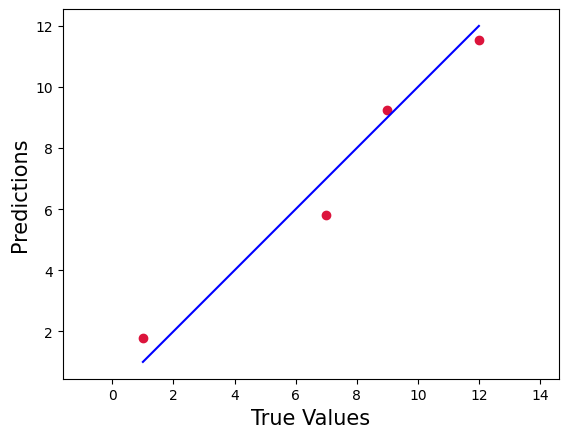

In [ ]:
# biểu đồ phân tán giữa giá trị thực tế (y_test) và giá trị dự đoán (y_test_pred) từ mô hình hồi quy tuyến tính.
#  Mục đích của biểu đồ này là kiểm tra độ chính xác của mô hình bằng cách so sánh các giá trị dự đoán với giá trị thực tế.
y_test_pred = model.predict(X_test)

plt.scatter(y_test, y_test_pred, c='crimson')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Biểu đồ sẽ cho bạn thấy các điểm phân tán giữa giá trị thực tế và giá trị dự đoán:

# Nếu mô hình dự đoán hoàn hảo, tất cả các điểm sẽ nằm trên đường chéo (y = x).
# Các điểm nằm gần đường chéo cho thấy mô hình dự đoán tốt, trong khi các điểm cách xa đường chéo cho thấy sai số lớn trong dự đoán.

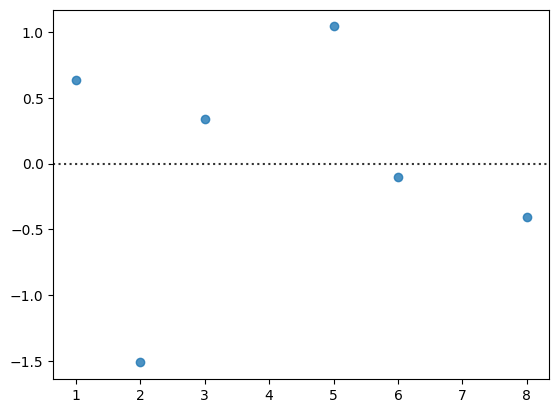

In [ ]:
# (Train data set) Vẽ residual bằng Python
sns.residplot(x=X_train, y=y_train)
plt.show()

# Nếu mô hình hồi quy phù hợp với dữ liệu, residuals sẽ phân bố ngẫu nhiên quanh 0 mà không có sự tập trung theo hình thức nào,
#  điều này cho thấy không có sự lệch hay xu hướng trong dữ liệu.

# Nếu biểu đồ residuals có mẫu (ví dụ: phân bố theo đường chéo hoặc hình parabol), có thể có sự thiếu sót trong mô hình,
#  chẳng hạn như mối quan hệ phi tuyến tính mà mô hình tuyến tính không thể mô phỏng.

In [6]:
# Lưu trữ mô hình đã huấn luyện xuống ổ đĩa
# '''
# Lưu trữ mô hình hồi quy xuống thiết bị lưu trữ với tên
# model_linear_regression.sav
# '''
import pickle
pickle.dump(model, open('model_linear_regression.sav', 'wb'))


import pickle
#Load model từ storage
loaded_model = pickle.load(open('model_linear_regression.sav', 'rb'))

vTimeAds = float(input('Nhập thời lượng quảng cáo: '))

predicted_ProfitRate = loaded_model.predict([[vTimeAds]])

print(f'Dự báo điểm ProfitRate là: {predicted_ProfitRate}')

Dự báo điểm ProfitRate là: [[14.99521531]]
